In [57]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("../Dataset/parkinsons.data")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [6]:
inds = pd.isnull(df).any() 
inds

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

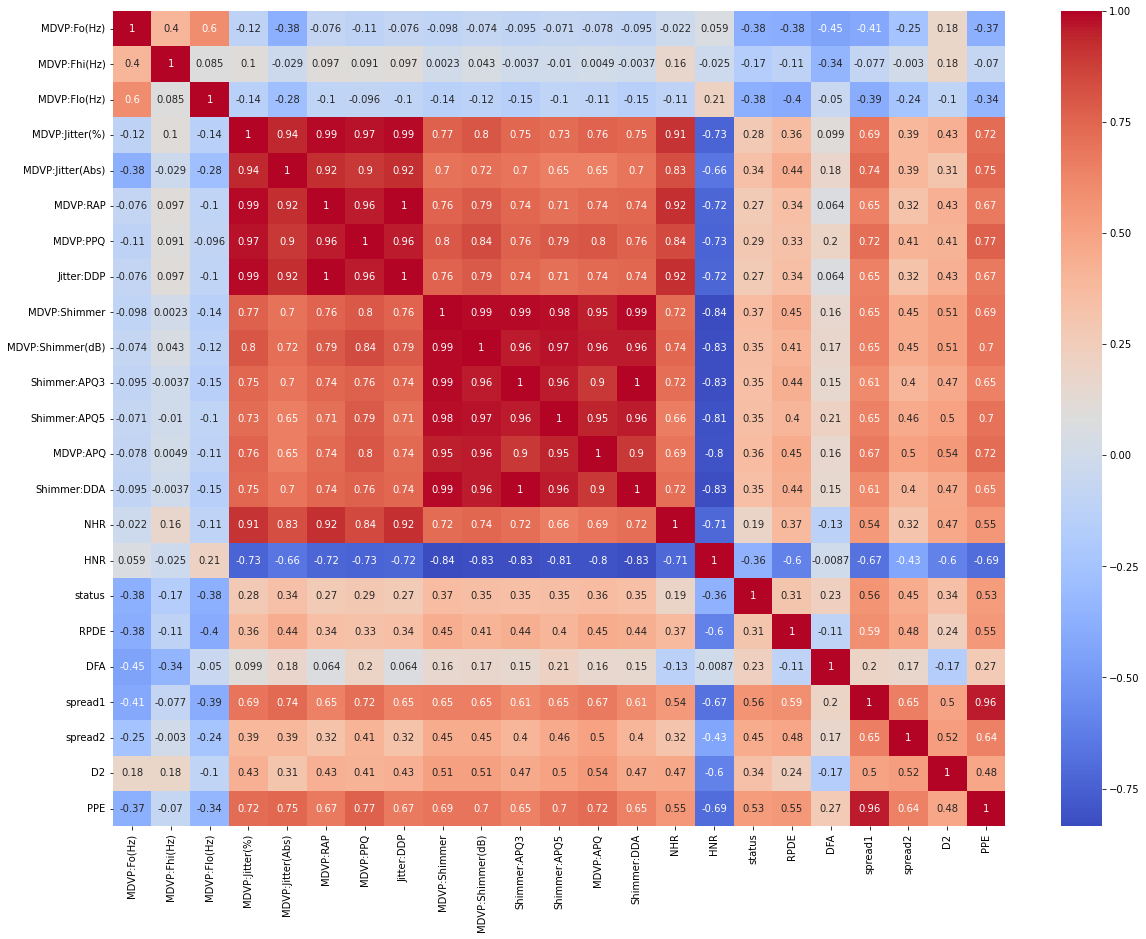

In [7]:
corr = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

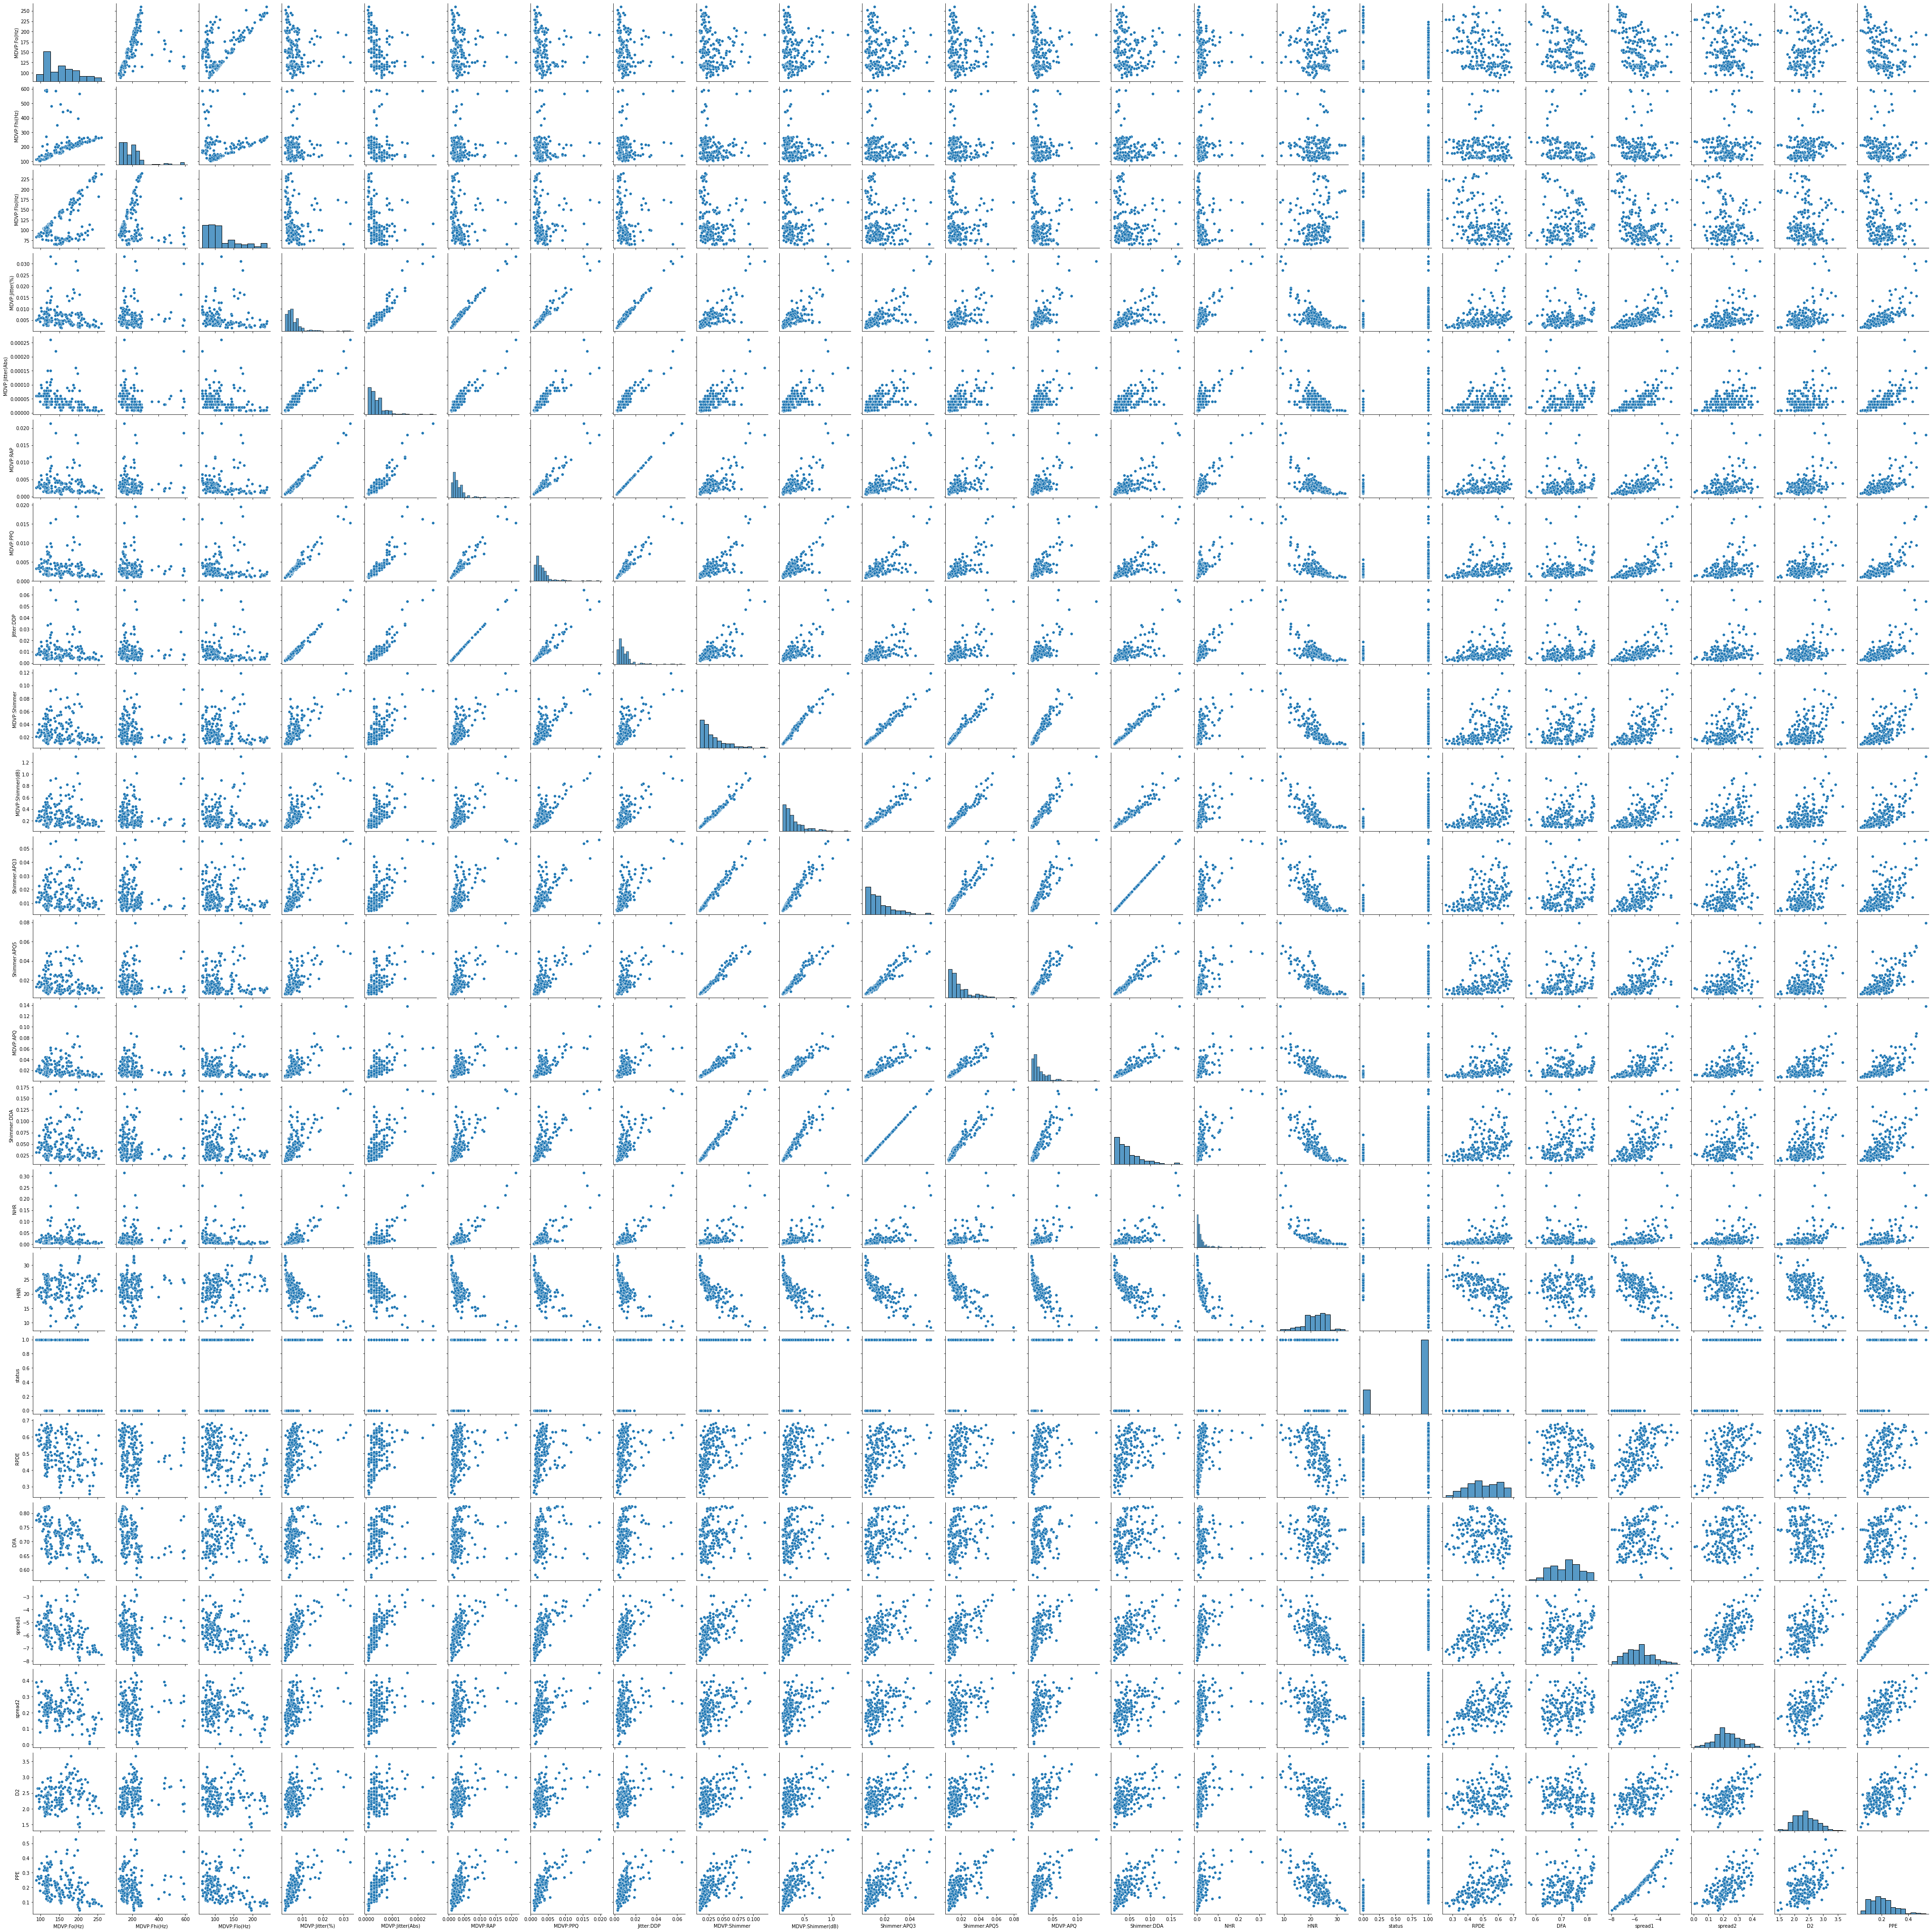

In [8]:
sns.pairplot(df)
plt.show()

## Splitting the data

In [42]:
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values
features.shape

(195, 22)

In [69]:
x_train,x_test,y_train,y_test=train_test_split(features, labels, test_size=0.2, random_state=42)
x_train.shape

(156, 22)

## XGboost

In [45]:
model=XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [47]:
y_pred_xg = model.predict(x_test)
acc_xg = accuracy_score(y_test, y_pred_xg)
print(acc_xg*100)

94.87179487179486


## SVM

In [23]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [48]:
y_pred_svm = clf.predict(x_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(acc_svm*100)

84.61538461538461


## KNN

Minimum error:  0.15384615384615385 at K = 7


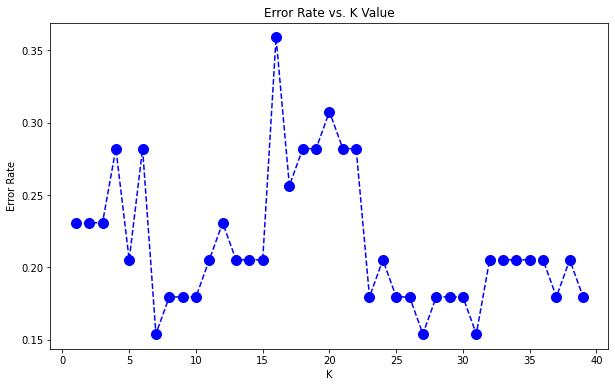

In [93]:
#finding the k value
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i,p=2,metric ='minkowski')
 knn.fit(x_train_pca,y_train)
 pred_i = knn.predict(x_test_pca)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",((error_rate.index(min(error_rate))+1)))

In [97]:
pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
classifi = KNeighborsClassifier(n_neighbors=7 ,p=2,metric ='minkowski')
classifi.fit(x_train_pca,y_train)
y_pred_knn = classifi.predict(x_test_pca)

In [98]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print(acc_knn*100)

84.61538461538461


## Random forest

In [95]:
random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=5)
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=5)

In [96]:
y_pred_rf = random_forest.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(acc_rf*100)

92.3076923076923


## Comparing the Accuracies

In [101]:
accuracies = [acc_xg, acc_svm, acc_knn, acc_rf]
models=['XGboost', 'SVM', 'KNN', 'Random Forest']


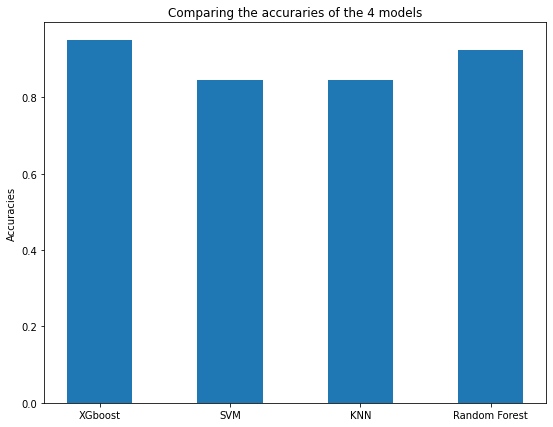

In [107]:
x = np.arange(len(models))
width = 0.5  
plt.figure(figsize=(9,7))
plt.bar(x, accuracies, width)
plt.ylabel('Accuracies')
plt.title('Comparing the accuraries of the 4 models')
plt.xticks(x, models)
plt.show()

In [108]:
accuracies

[0.9487179487179487,
 0.8461538461538461,
 0.8461538461538461,
 0.9230769230769231]

In [119]:
X=df.loc[:,df.columns!='status']
y=df.loc[:,'status']
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(features)
X= pd.DataFrame(data=X)

In [120]:
#using k fold cross validation to see if the accuraries improve
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=52,shuffle=True)
xg = []
svm_ = []
knn = []
rf_ = []

xg_2 = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
svm_2 = svm.SVC()
knn_2 = KNeighborsClassifier(n_neighbors=7 ,p=2,metric ='minkowski')
rf_2 = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=5)

for train_index, test_index in kf.split(X=X,y=y):
    X_train, X_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index],y[train_index],y[test_index]
    xg_2.fit(X_train, y_train)
    svm_2.fit(X_train, y_train)
    knn_2.fit(X_train, y_train)
    rf_2.fit(X_train, y_train)
    xg.append(xg_2.score(X_test, y_test) ) 
    svm_.append(svm_2.score(X_test, y_test) ) 
    knn.append(knn_2.score(X_test, y_test) ) 
    rf_.append(rf_2.score(X_test, y_test) ) 

accuracies_kf = [sum(xg) /len(xg), sum(svm_) /len(svm_), sum(knn) /len(knn), sum(rf_) /len(rf_)]
print(accuracies_kf)

[0.9223684210526317, 0.8721052631578947, 0.9231578947368423, 0.9023684210526314]


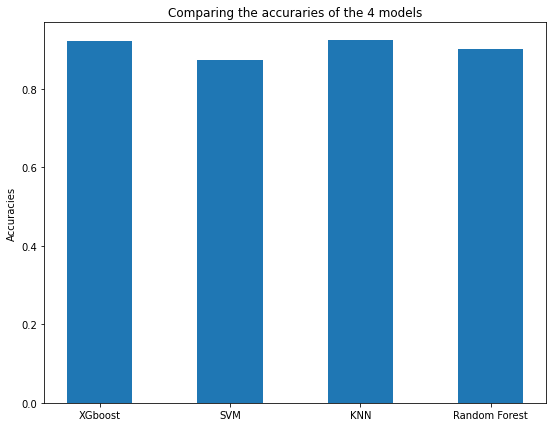

In [121]:
x = np.arange(len(models))
width = 0.5  
plt.figure(figsize=(9,7))
plt.bar(x, accuracies_kf, width)
plt.ylabel('Accuracies')
plt.title('Comparing the accuraries of the 4 models')
plt.xticks(x, models)
plt.show()

XGboost has the highest accuracy(almost 95%), and random forest is the next highest(92%), KNN and SVM have lower accuracies comparitively but using 5 fold cross validation increases the accuracy from 85% to 87% and 92% respectivey. Therefore XGboost is the best choice here.